In [9]:
import testing
from remi.datatypes import KeyValueStore
from remi.supports import RedisInterface
from remi import shippers
import time, datetime
import numpy as np
from matplotlib import pyplot as plt

def make_complex_dictionary():
    time_string = str(datetime.datetime.now())
    random_array = np.random.rand(3, 4)
    test = {}
    for i in range(20):
        test["time_{}".format(i)] = time_string
        test["numpy_{}".format(i)] = random_array
    subdict = {}
    test["subpath"] = subdict
    for k in range(10):
        subdict["sub_{}".format(k)] = {}
        subdict = subdict["sub_{}".format(k)]
    subdict["nparr"] = random_array
    subdict["time"] = time_string
    return test

def hundred_key_dictionary():
    test = {}
    random_array = np.random.rand(3, 4)
    time_string = str(datetime.datetime.now())
    for i in range(50):
        test["time_{}".format(i)] = time_string
        test["numpy_{}".format(i)] = random_array
    return test

def ten_level_dictionary():
    test = {}
    random_array = np.random.rand(3, 4)
    time_string = str(datetime.datetime.now())
    subdict = test
    for k in range(10):
        subdict["sub_{}".format(k)] = {}
        subdict = subdict["sub_{}".format(k)]
    subdict["nparr"] = random_array
    subdict["time"] = time_string
    return test
    
flat_data = {'points': 30, 'rebounds': 20}
nested_data = {
        'name': 'Jack',
        'age': 26,
        'stats': {
            'points': 30,
            'rebounds': 20
        }
    }

big_nparray_dict = {"nparr": np.reshape(np.arange(640*480*3), (640, 480, 3))}
hundred_key_dict = hundred_key_dictionary()
ten_level_dictionary = ten_level_dictionary()
interface = RedisInterface(host="localhost", shippers=[shippers.NumpyHandler()])
interface.initialize()
server = KeyValueStore(interface)

In [10]:
def set_flat():
    server["flat_data"] = flat_data

def set_nested():
    server["nested_data"] = nested_data
    
def set_hundred_key():
    server["hundred_data"] = hundred_key_dict

def set_bignpyarr():
    server["big_numpy_arr"] = big_nparray_dict

In [11]:
iterations = 100
times = []
current_time = time.time()
for i in range(iterations):
    set_bignpyarr()
    times.append( (time.time() - current_time) * 1000)
    current_time = time.time()

{'whiskers': [<matplotlib.lines.Line2D at 0x114d260f0>,
 'caps': [<matplotlib.lines.Line2D at 0x114d267b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x114d1cf60>],
 'medians': [<matplotlib.lines.Line2D at 0x114d26e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x114d301d0>],
 'means': []}

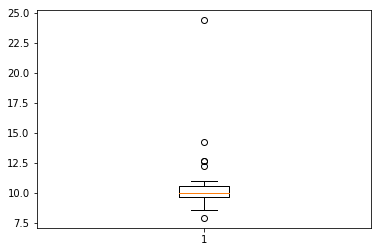

In [12]:
plt.boxplot(times)